In [11]:
import pandas as pd
import sqlite3

In [12]:
conn = sqlite3.connect('../data/checking-logs.sqlite')

# Exercise 01 : Line chart with styles

In [13]:
query = """
SELECT v.date, v.views_count, c.commits_count
FROM (
    SELECT DATE(datetime) as date, COUNT(*) as views_count
    FROM pageviews
    WHERE uid LIKE 'user_%'
    GROUP BY date
) v
JOIN (
    SELECT DATE(timestamp) as date, COUNT(*) as commits_count
    FROM checker
    WHERE uid LIKE 'user_%'
    GROUP BY date
) c ON v.date = c.date
"""
df = pd.read_sql(query, conn, parse_dates=['date'])
conn.close()

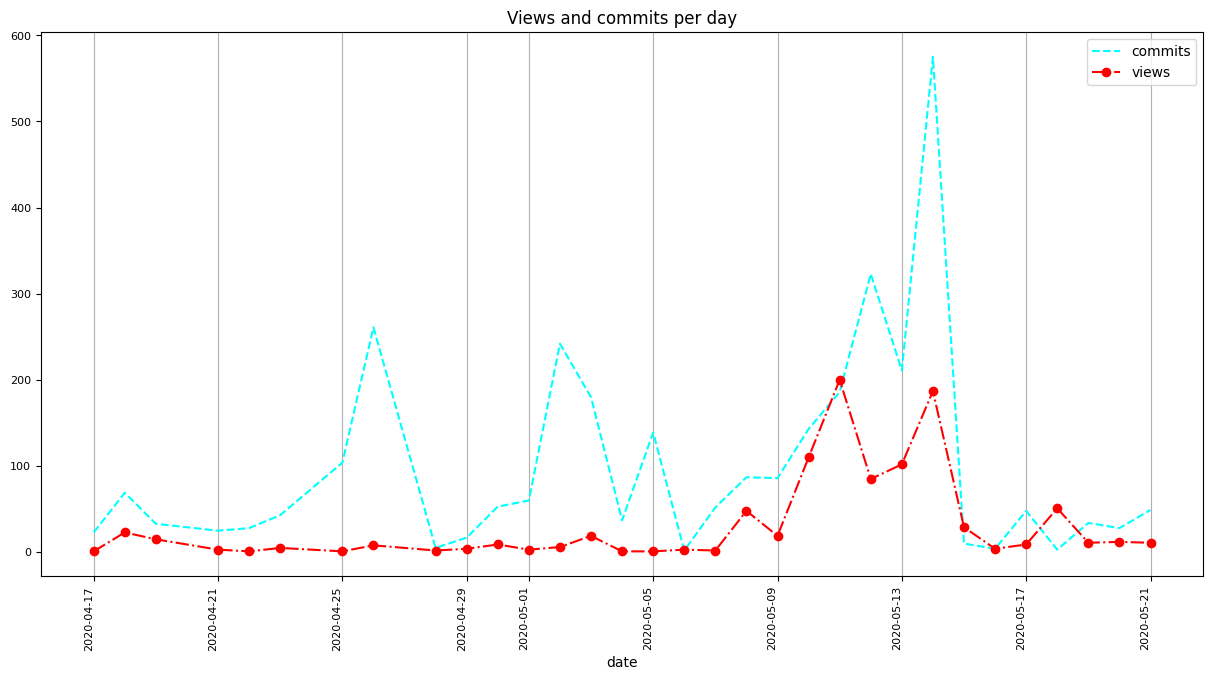

In [14]:
ax = df.plot(x='date', y='commits_count', label = "commits", linestyle="--", fontsize=8, figsize=(15, 8), color='cyan', title='Views and commits per day')
df.plot(x='date', y='views_count', label = "views", style="o-.", ax=ax, color='red')
ax.tick_params(axis='x', rotation=90)
ax.grid(True, axis='x')

How many times was the number of views larger than 150? 2